  ###  <center>Name - Ashish Kumar  
### <center> Email - ashishok88@gmail.com 
### <center> AI Minor Project Smartknower 
###  <center>Date - 18-08-2022
<br>

#### <b>Importing the Datasets</b>

In [23]:
from keras.datasets import mnist 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

#### <b>Train and Test split of Data</b>

In [24]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [25]:
x_train = x_train[:5000,:,:]
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)   

(5000, 28, 28)
(1000, 28, 28)
(5000,)
(1000,)


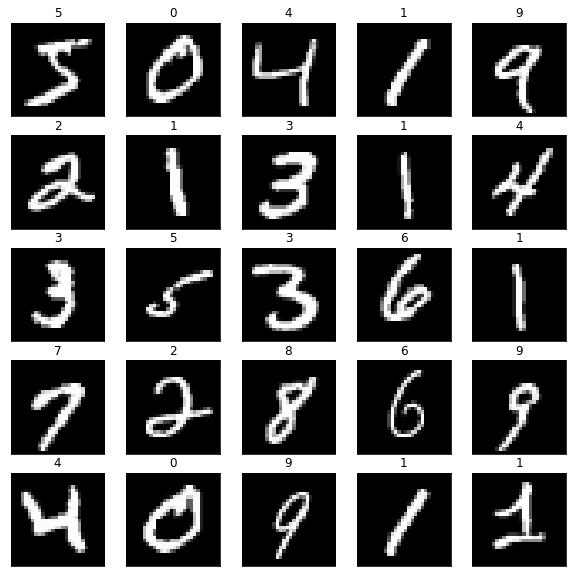

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i])
plt.show()

##### <i>Before Normalization </i>

In [28]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [29]:
#Normalizing the datasets
x_train = x_train/255
x_test = x_test /255

##### <i>After Normalization </i>
Normalization is a technique used to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.<br> 

In [30]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [31]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
x_train.shape

(5000, 28, 28, 1)

In [32]:
print(y_train)
print(y_test)

[5 0 4 ... 2 1 2]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 4 4 2 4 1 9 5 7 7 2 8 2
 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4
 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 9 2 9 3 0 4 2 0 7 1 1 2 1
 5 3 3 9 7 8 6 5 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9 4 6 2 2 5 0 6 5 6 3
 7 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 8 2 4 5
 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 8 8 3 7 6 0 0 3 0
 2 6 6 4 9 3 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2 7 5 8 9 6 1 8 4 1 2 5 9 1
 9 7 5 

<br> 

## <center><i>Building the Model</i>

In [33]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.python.keras.callbacks import EarlyStopping

In [34]:
m1 = Sequential()
m1.add(Conv2D(64,(3,3),input_shape = (28,28,1),activation ="relu"))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(32,(3,3),activation ="relu"))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dropout(0.25))
m1.add(Dense(64,activation='relu'))
m1.add(Dropout(0.25))
m1.add(Dense(32,activation='relu'))
m1.add(Dropout(0.25))
m1.add(Dense(10,activation='softmax'))

 

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
es = EarlyStopping(monitor='val_loss',patience=5)

In [36]:
# m1.summary()

In [37]:
# h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,callbacks=[es])

In [38]:
r1 = pd.DataFrame(h1.history)
r1['Epoch'] = h1.epoch
r1 

NameError: name 'h1' is not defined

#### <i>loss vs. val_loss on line chart</i>

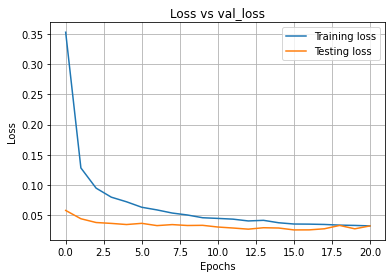

In [ ]:
plt.plot(r1['Epoch'],r1['loss'],label='Training loss')
plt.plot(r1['Epoch'],r1['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs val_loss')
plt.legend()
plt.grid()
plt.show()

#### <i>Accuracy vs. val_accuracy on line chart.</i>

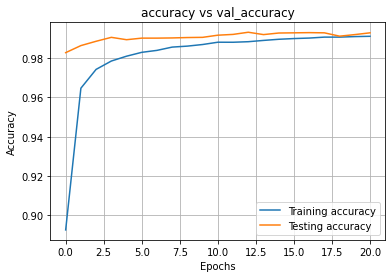

In [ ]:
plt.plot(r1['Epoch'],r1['accuracy'],label='Training accuracy')
plt.plot(r1['Epoch'],r1['val_accuracy'],label='Testing accuracy')
plt.xlabel('Epochs')
plt.title('accuracy vs val_accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## <center> <i>Predictions on test_data</i> 


In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
ypred = m1.predict(x_test)
print(ypred)

[[2.00810892e-22 9.16731371e-16 1.72565749e-12 ... 1.00000000e+00
  4.99269706e-20 3.96735492e-11]
 [7.03632248e-12 2.23197138e-11 1.00000000e+00 ... 1.73764356e-12
  2.83365873e-15 2.59356112e-18]
 [9.56988798e-22 1.00000000e+00 8.71188379e-15 ... 1.03735597e-10
  2.11173318e-15 1.54280370e-15]
 ...
 [1.06481312e-19 2.65844446e-15 6.77281655e-17 ... 1.53695227e-16
  4.21372843e-13 1.46724481e-08]
 [1.24474074e-19 1.71944016e-17 1.42272594e-20 ... 4.76522821e-20
  2.03083687e-12 1.55113186e-13]
 [3.10968834e-13 3.65063723e-17 1.28610809e-16 ... 4.92375977e-26
  3.90078757e-13 3.34584632e-19]]


In [ ]:
print(y_test.shape)
print(ypred.shape)

(10000,)
(10000, 10)


In [ ]:
res1 = pd.DataFrame({'y_test':y_test,'y_pred':[*ypred]})
res1.head()

,y_test,y_pred
0,7,"[2.0081089e-22, 9.167314e-16, 1.7256575e-12, 2..."
1,2,"[7.0363225e-12, 2.2319714e-11, 1.0, 4.9127955e..."
2,1,"[9.569888e-22, 1.0, 8.711884e-15, 2.758188e-19..."
3,0,"[1.0, 6.4920675e-18, 4.237622e-11, 1.543834e-1..."
4,4,"[1.5431241e-18, 3.245636e-13, 2.4806144e-14, 8..."


In [ ]:
ypred_m1 = [np.argmax(i) for i in ypred]
# print(ypred_m1)

<br><br>
#### <i> Confusion matrix and classification report</i>

In [ ]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1132    2    1    0    0    0    0    0    0]
 [   0    0 1029    0    0    0    0    3    0    0]
 [   0    0    2 1000    0    6    0    1    1    0]
 [   0    0    0    0  977    0    2    0    0    3]
 [   1    0    0    3    0  886    1    1    0    0]
 [   1    3    1    0    2    3  948    0    0    0]
 [   0    2    3    0    0    0    0 1023    0    0]
 [   2    1    2    2    0    2    0    1  962    2]
 [   0    1    0    0    6    2    0    4    1  995]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00   

In [ ]:
m1.save('Digit_recog.h5')